In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Method 1(better mosre secured)

from google.colab import userdata
import os

# Store your credentials in Colab Secrets first (see below)
os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

!kaggle datasets download -d marcodena/mobile-phone-activity #marcodena/mobile-phone-activity
!unzip mobile-phone-activity.zip


Dataset URL: https://www.kaggle.com/datasets/marcodena/mobile-phone-activity
License(s): DbCL-1.0
 88% 212M/242M [00:00<00:00, 542MB/s] 
100% 242M/242M [00:00<00:00, 527MB/s]
Archive:  mobile-phone-activity.zip
  inflating: ISTAT_census_variables_2011.csv  
  inflating: Italian_provinces.geojson  
  inflating: mi-to-provinces-2013-11-01.csv  
  inflating: mi-to-provinces-2013-11-02.csv  
  inflating: mi-to-provinces-2013-11-03.csv  
  inflating: mi-to-provinces-2013-11-04.csv  
  inflating: mi-to-provinces-2013-11-05.csv  
  inflating: mi-to-provinces-2013-11-06.csv  
  inflating: mi-to-provinces-2013-11-07.csv  
  inflating: milano-grid.geojson     
  inflating: sms-call-internet-mi-2013-11-01.csv  
  inflating: sms-call-internet-mi-2013-11-02.csv  
  inflating: sms-call-internet-mi-2013-11-03.csv  
  inflating: sms-call-internet-mi-2013-11-04.csv  
  inflating: sms-call-internet-mi-2013-11-05.csv  
  inflating: sms-call-internet-mi-2013-11-06.csv  
  inflating: sms-call-internet-mi-2

### 1. Load 3 SMS/call/internet activity data (sms-call-internet-mi-2013-11-02.csv,sms-call-internet-mi-2013-11-04.csv, sms-call-internet-mi-2013-11-06.csv) and combine them.

In [3]:
# Data load
sms_call_internet_1 = pd.read_csv('sms-call-internet-mi-2013-11-02.csv')
sms_call_internet_2 = pd.read_csv('sms-call-internet-mi-2013-11-04.csv')
sms_call_internet_3 = pd.read_csv('sms-call-internet-mi-2013-11-06.csv')

# Date time convertion
sms_call_internet_1['datetime']=pd.to_datetime(sms_call_internet_1['datetime'])
sms_call_internet_2['datetime']=pd.to_datetime(sms_call_internet_2['datetime'])
sms_call_internet_3['datetime']=pd.to_datetime(sms_call_internet_3['datetime'])

# Data merge
sms_call_df=pd.concat([sms_call_internet_1,sms_call_internet_2,sms_call_internet_3])
sms_call_df.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-02,1,0,0.2445,NaN,NaN,NaN,NaN
1,2013-11-02,1,39,1.4952,1.1213,0.2708,0.3004,46.5094
2,2013-11-02,1,53,0.0018,0.0036,NaN,NaN,NaN
3,2013-11-02,2,0,0.2458,NaN,NaN,NaN,NaN
4,2013-11-02,2,39,1.5028,1.1243,0.2751,0.3023,46.6933


In [4]:
print(f"sms 1: {sms_call_internet_1.shape}")
print(f"sms 2: {sms_call_internet_2.shape}")
print(f"sms 3: {sms_call_internet_3.shape}")
total_sms=sms_call_internet_1.shape[0]+sms_call_internet_2.shape[0]+sms_call_internet_3.shape[0]
print(f"total sms: {total_sms}")
print(f"sms_call_df: {sms_call_df.shape}")

sms 1: (1847331, 8)
sms 2: (2299544, 8)
sms 3: (2417156, 8)
total sms: 6564031
sms_call_df: (6564031, 8)


In [5]:
missing_values = sms_call_df.isnull().sum()
percent_missing_vals=(missing_values/len(sms_call_df))*100
cols_with_missing_vals=percent_missing_vals[percent_missing_vals>0]
print(percent_missing_vals)
print("==========")
print(cols_with_missing_vals)

datetime        0.000000
CellID          0.000000
countrycode     0.000000
smsin          60.392326
smsout         76.564812
callin         72.542086
callout        57.350186
internet       55.166056
dtype: float64
smsin       60.392326
smsout      76.564812
callin      72.542086
callout     57.350186
internet    55.166056
dtype: float64


In [6]:
# Total number of missing vals
total_missing_vals=sms_call_df.isnull().sum().sum()
print(f"Total number of missing vals: {total_missing_vals}")

Total number of missing vals: 21137195


In [7]:
# Filling missing vals with mean

sms_call_df['callin']=sms_call_df['callin'].fillna(sms_call_df['callin'].mean())
sms_call_df['callout']=sms_call_df['callout'].fillna(sms_call_df['callout'].mean())
sms_call_df['internet']=sms_call_df['internet'].fillna(sms_call_df['internet'].mean())
sms_call_df['smsin']=sms_call_df['smsin'].fillna(sms_call_df['smsin'].mean())
sms_call_df['smsout']=sms_call_df['smsout'].fillna(sms_call_df['smsout'].mean())


In [8]:
sms_call_df.isnull().sum()

,0
datetime,0
CellID,0
countrycode,0
smsin,0
smsout,0
callin,0
callout,0
internet,0


In [9]:
# sms_call_df['datetime']=pd.to_datetime(sms_call_df['datetime'])
sms_call_df['date']=sms_call_df['datetime'].dt.date
sms_call_df['hour']=sms_call_df['datetime'].dt.time
sms_call_df.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,date,hour
0,2013-11-02,1,0,0.2445,7.440751,7.738604,5.686694,101.976153,2013-11-02,00:00:00
1,2013-11-02,1,39,1.4952,1.121300,0.270800,0.300400,46.509400,2013-11-02,00:00:00
2,2013-11-02,1,53,0.0018,0.003600,7.738604,5.686694,101.976153,2013-11-02,00:00:00
3,2013-11-02,2,0,0.2458,7.440751,7.738604,5.686694,101.976153,2013-11-02,00:00:00
4,2013-11-02,2,39,1.5028,1.124300,0.275100,0.302300,46.693300,2013-11-02,00:00:00


In [10]:
# Aggregate
sms_call_df['total_sms']=sms_call_df['smsin']+sms_call_df['smsout']
sms_call_df['total_calls']=sms_call_df['callin']+sms_call_df['callout']
sms_call_df['total_internet']=sms_call_df['internet']

In [11]:
sms_call_df.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,date,hour,total_sms,total_calls,total_internet
0,2013-11-02,1,0,0.2445,7.440751,7.738604,5.686694,101.976153,2013-11-02,00:00:00,7.685251,13.425298,101.976153
1,2013-11-02,1,39,1.4952,1.121300,0.270800,0.300400,46.509400,2013-11-02,00:00:00,2.616500,0.571200,46.509400
2,2013-11-02,1,53,0.0018,0.003600,7.738604,5.686694,101.976153,2013-11-02,00:00:00,0.005400,13.425298,101.976153
3,2013-11-02,2,0,0.2458,7.440751,7.738604,5.686694,101.976153,2013-11-02,00:00:00,7.686551,13.425298,101.976153
4,2013-11-02,2,39,1.5028,1.124300,0.275100,0.302300,46.693300,2013-11-02,00:00:00,2.627100,0.577400,46.693300


In [12]:
# Unique cell ids and country code
unique_ids=sms_call_df['CellID'].nunique()
country_code=sms_call_df['countrycode'].nunique()
print(f"Unique Cell IDs: {unique_ids}")
print(f"Unique Country code: {country_code}")

Unique Cell IDs: 10000
Unique Country code: 302


### What is the most common peak hour across all grids and lowest activity? (5)


In [46]:
peak_hour=sms_call_df.groupby('hour')['total_calls'].sum()
# least_peak_hour=sms_call_df.groupby('hour')['total_calls'].sum()
hour_peak_df=pd.DataFrame({'peak_hour':peak_hour})
# hour_least_peak_df=pd.DataFrame({'least_peak_hour':least_peak_hour})


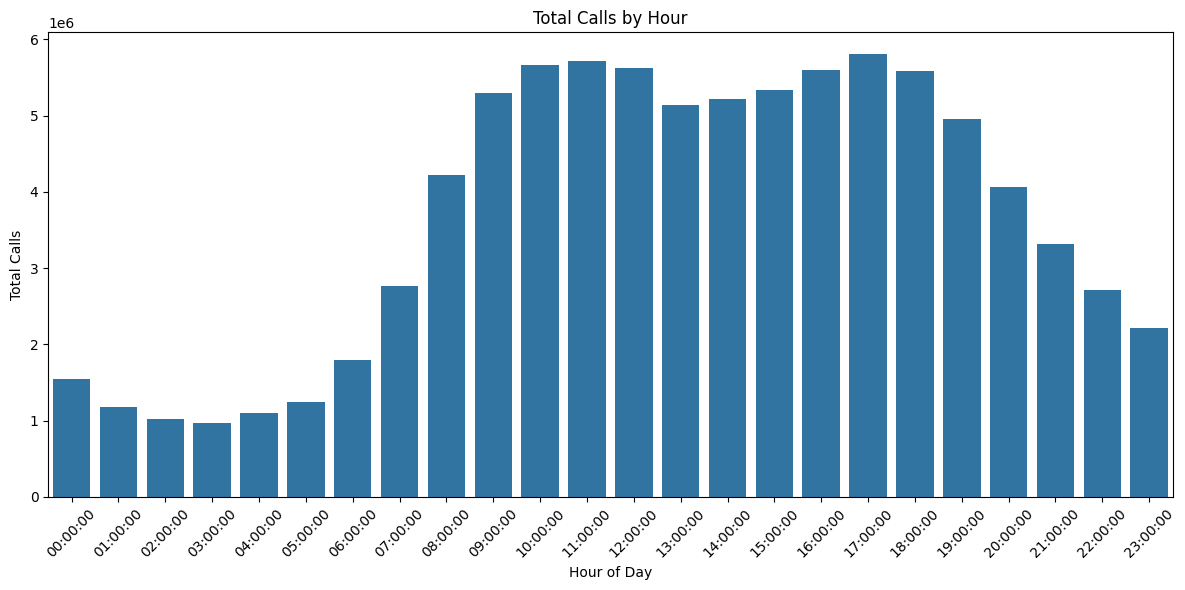

In [51]:
# common peak hour across grid and lowest activity plot

plt.figure(figsize=(12,6))
sns.barplot(x=hour_peak_df.index.astype(str), y=hour_peak_df['peak_hour'])
plt.xlabel('Hour of Day')
plt.ylabel('Total Calls')
plt.title('Total Calls by Hour')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Calculate and report: mean, median, std, min, max for total calls by hour

In [14]:
call_hourly_stats=sms_call_df.groupby('hour')['total_calls'].agg(['mean','median','std','min','max'])
print(call_hourly_stats)

               mean     median        std     min        max
hour                                                        
00:00:00  10.280157  13.425298   5.279040  0.0002   223.4941
01:00:00   9.928661  13.425298   5.129893  0.0000   141.9847
02:00:00   9.894713  13.425298   5.329786  0.0000   210.9691
03:00:00   9.953373  13.425298   5.649571  0.0000   298.3541
04:00:00  10.235666  13.425298   5.294288  0.0000   255.0555
05:00:00  10.029019  13.425298   5.395003  0.0000   177.1690
06:00:00  10.339697  13.425298   4.969421  0.0002   201.3488
07:00:00  11.464472  13.425298   8.435423  0.0000   412.7314
08:00:00  13.272816  13.425298  22.237365  0.0000  1122.7091
09:00:00  14.508306  13.425298  35.498836  0.0000  1972.8289
10:00:00  14.923601   9.520804  41.338244  0.0000  2402.6425
11:00:00  15.033117   8.908054  43.038147  0.0000  2565.0524
12:00:00  14.506823   8.501204  41.418042  0.0000  2724.3738
13:00:00  13.988444   8.527204  37.615605  0.0000  2464.7908
14:00:00  14.187473   8.

### What percentage of total activity happens during daytime (6am-8pm) vs nighttime(8 pm -6 am)?

In [15]:
# total activity
sms_call_df['total_activity']=sms_call_df['total_calls'] + sms_call_df['total_sms'] + sms_call_df['total_internet']
total_activity=sms_call_df['total_activity'].sum()
print(f"Total activity: {total_activity}")

Total activity: 857946276.4095925


In [16]:
# Day time

day_period=sms_call_df[(sms_call_df['hour'] >= pd.to_datetime('06:00:00').time()) &(sms_call_df['hour'] < pd.to_datetime('20:00:00').time())]

# Night time
night_period=sms_call_df[(sms_call_df['hour'] >= pd.to_datetime('20:00:00').time()) | (sms_call_df['hour'] < pd.to_datetime('06:00:00').time())]

percentage_day=len(day_period)/len(sms_call_df)*100
percentage_night=len(night_period)/len(sms_call_df)*100

print(f"Percentage of total activity during daytime: {percentage_day}")
print(f"Percentage of total activity during nighttime: {percentage_night}")


Percentage of total activity during daytime: 73.7404043338613
Percentage of total activity during nighttime: 26.25959566613869


In [17]:
# sms_call_df['countrycode'].unique()

 ### Do international calls happen at different times than domestic? (compare hourly patterns)


In [18]:
domestic_calls=sms_call_df[sms_call_df['countrycode']==39]
international_calls=sms_call_df[sms_call_df['countrycode']!=39]


In [19]:
print(domestic_calls.shape)
print(international_calls.shape)

(719995, 14)
(5844036, 14)


In [20]:
sms_call_df.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,date,hour,total_sms,total_calls,total_internet,total_activity
0,2013-11-02,1,0,0.2445,7.440751,7.738604,5.686694,101.976153,2013-11-02,00:00:00,7.685251,13.425298,101.976153,123.086702
1,2013-11-02,1,39,1.4952,1.121300,0.270800,0.300400,46.509400,2013-11-02,00:00:00,2.616500,0.571200,46.509400,49.697100
2,2013-11-02,1,53,0.0018,0.003600,7.738604,5.686694,101.976153,2013-11-02,00:00:00,0.005400,13.425298,101.976153,115.406850
3,2013-11-02,2,0,0.2458,7.440751,7.738604,5.686694,101.976153,2013-11-02,00:00:00,7.686551,13.425298,101.976153,123.088002
4,2013-11-02,2,39,1.5028,1.124300,0.275100,0.302300,46.693300,2013-11-02,00:00:00,2.627100,0.577400,46.693300,49.897800


In [53]:
# No of calls at different hours
domestic_hourly=domestic_calls.groupby('hour')['total_calls'].mean()
international_hourly=international_calls.groupby('hour')['total_calls'].mean()

In [54]:
hourly_df=pd.DataFrame({'domestic_hourly':domestic_hourly,'international_hourly':international_hourly})
print(hourly_df)

          domestic_hourly  international_hourly
hour                                           
00:00:00         4.669291             11.680457
01:00:00         3.253977             12.168112
02:00:00         3.871361             12.339537
03:00:00         4.357624             12.437824
04:00:00         4.310516             12.529238
05:00:00         3.076117             12.236029
06:00:00         3.917451             11.684576
07:00:00        14.715206             11.002251
08:00:00        40.760643             10.410773
09:00:00        65.336676              9.958970
10:00:00        76.478743              9.643931
11:00:00        79.314779              9.532941
12:00:00        74.028499              9.520714
13:00:00        63.978655              9.547252
14:00:00        66.698597              9.527150
15:00:00        69.299109              9.539143
16:00:00        76.850111              9.470947
17:00:00        82.472142              9.446846
18:00:00        77.589839              9

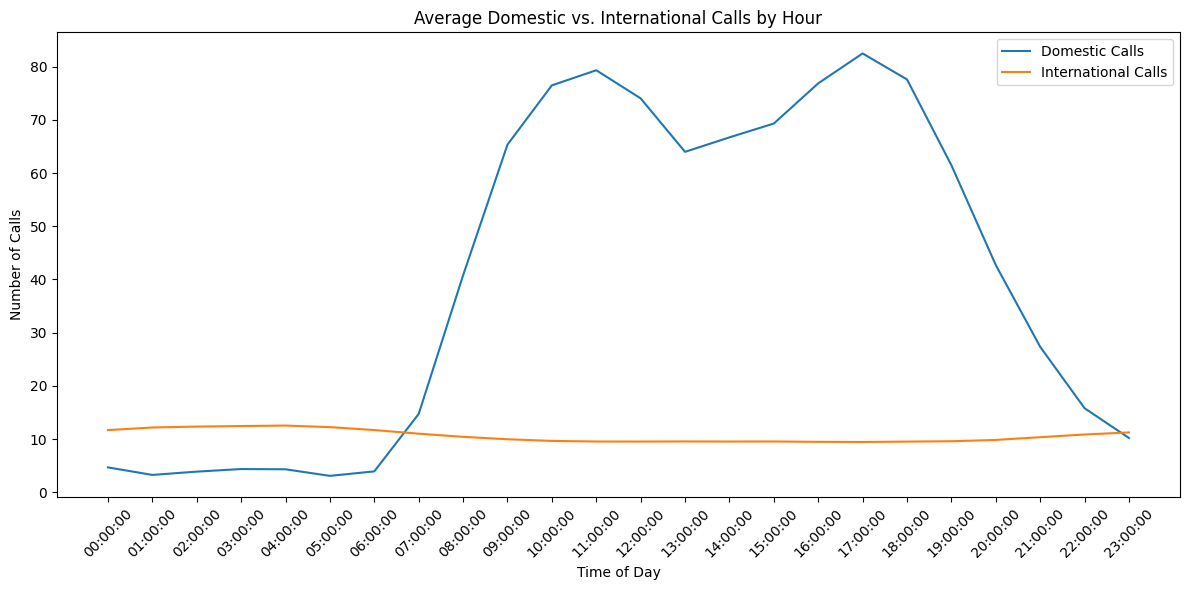

In [56]:
# Visualize x axis is time, y is the line plot for domestic and hourly
plt.figure(figsize=(12,6))
plt.plot(hourly_df.index.astype(str), hourly_df['domestic_hourly'], label='Domestic Calls')
plt.plot(hourly_df.index.astype(str), hourly_df['international_hourly'], label='International Calls')
plt.xlabel('Time of Day')
plt.ylabel('Number of Calls')
plt.title('Average Domestic vs. International Calls by Hour')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
# Percentage of domestic vs international calls
percentage_domestic_calls=(domestic_calls['total_calls'].sum()/sms_call_df['total_calls'].sum())*100
# percentage_international=len(international_calls)/len(sms_call_df)*100
percentage_international_calls=100-percentage_domestic_calls
print(f"Percentage of domestic calls: {percentage_domestic_calls}")
print(f"Percentage of international calls: {percentage_international_calls}")

Percentage of domestic calls: 33.10585798101129
Percentage of international calls: 66.8941420189887


In [25]:
percentage_domestic_sms=(domestic_calls['total_sms'].sum()/sms_call_df['total_sms'].sum())*100
percentage_international_sms=100-percentage_domestic_sms
print(f"Percentage of domestic sms: {percentage_domestic_sms}")
print(f"Percentage of international sms: {percentage_international_sms}")

Percentage of domestic sms: 24.98114534196831
Percentage of international sms: 75.01885465803169


In [26]:
# Ratio of incoming vs outgoing international calls
incoming_calls=international_calls['callin'].sum()
outgoing_calls=international_calls['callout'].sum()
print(f"Incoming international calls: {incoming_calls}")
print(f"Outgoing international calls: {outgoing_calls}")

Incoming international calls: 36911800.81118532
Outgoing international calls: 22038040.62151703


In [27]:
print(f"Ratio of incoming international calls: {incoming_calls/outgoing_calls}")

Ratio of incoming international calls: 1.6749130036154924


In [28]:
sms_call_df.columns

Index(['datetime', 'CellID', 'countrycode', 'smsin', 'smsout', 'callin',
       'callout', 'internet', 'date', 'hour', 'total_sms', 'total_calls',
       'total_internet', 'total_activity'],
      dtype='object')

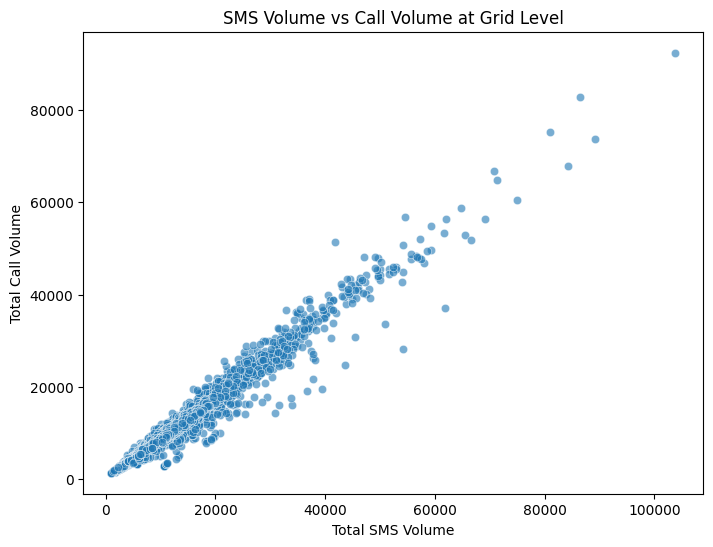

In [59]:
grid_df = sms_call_df.groupby('CellID').agg({
    'total_calls': 'sum',
    'total_sms': 'sum'
}).reset_index()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=grid_df['total_sms'], y=grid_df['total_calls'], alpha=0.6)

plt.xlabel('Total SMS Volume')
plt.ylabel('Total Call Volume')
plt.title('SMS Volume vs Call Volume at Grid Level')

plt.show()


In [62]:
# Average correlation - Pearson
correlation = sms_call_df.groupby('CellID').apply(
    lambda x: x['total_calls'].corr(x['total_sms'])
)

average_correlation = correlation.mean()
print(f"Average correlation CellID: {average_correlation}")

Average correlation CellID: 0.5127677240384001


/tmp/ipython-input-913861094.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation = sms_call_df.groupby('CellID').apply(
